# Gene expression cancer RNA-Seq Data Set

## Goal: 
>### Train models to determine a caner type given gene expression data of a patient. 
>### In this exercise, the cancer types are limited to BRCA, KIRC, COAD, LUAD and PRAD. More cancer types can be included.

## Background: 
>### This project was inspired by a similar UCI data set - a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD
>#### https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq
 

## Data Selection: 
>### For this UCSD Data Bootcamp projects, I downloaded five data sets from https://www.synapse.org/#!Synapse:syn2812961. All five data sets are Illumina HiSeq RNASeq V2 data collected by unc.edu:
>#### 1. unc.edu_BRCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv
>#### 2. unc.edu_COAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv
>#### 3. unc.edu_KIRC_IlluminaHiSeq_RNASeqV2.geneExp.tsv
>#### 4. unc.edu_LUAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv
>#### 5. unc.edu_PRAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv

### Data Set Information:

>#### Samples (instances) are stored column-wise. Variables (attributes in rows) of each sample are RNA-Seq gene expression levels measured by illumina HiSeqV2 platform.


### Relevant Papers:

>####  Weinstein, John N., et al. 'The cancer genome atlas pan-cancer analysis project.' Nature genetics 45.10 (2013): 1113-1120.


In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,8)

In [2]:
unc_BRCA = pd.read_csv('UNC.EDU/unc.edu_BRCA_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_COAD = pd.read_csv('UNC.EDU/unc.edu_COAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_KIRC = pd.read_csv('UNC.EDU/unc.edu_KIRC_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_LUAD = pd.read_csv('UNC.EDU/unc.edu_LUAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])
unc_PRAD = pd.read_csv('UNC.EDU/unc.edu_PRAD_IlluminaHiSeq_RNASeqV2.geneExp.tsv',delimiter='\t', index_col=["gene_id"])

In [3]:
unc_BRCA.head()

,TCGA-3C-AAAU-01A-11R-A41B-07,TCGA-3C-AALI-01A-11R-A41B-07,TCGA-3C-AALJ-01A-31R-A41B-07,TCGA-3C-AALK-01A-11R-A41B-07,TCGA-4H-AAAK-01A-12R-A41B-07,TCGA-5L-AAT0-01A-12R-A41B-07,TCGA-5L-AAT1-01A-12R-A41B-07,TCGA-5T-A9QA-01A-11R-A41B-07,TCGA-A1-A0SB-01A-11R-A144-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SE-01A-11R-A084-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SG-01A-11R-A144-07,TCGA-A1-A0SH-01A-11R-A084-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,TCGA-A1-A0SK-01A-12R-A084-07,TCGA-A1-A0SM-01A-11R-A084-07,TCGA-A1-A0SN-01A-11R-A144-07,TCGA-A1-A0SO-01A-22R-A084-07,TCGA-A1-A0SP-01A-11R-A084-07,TCGA-A1-A0SQ-01A-21R-A144-07,TCGA-A2-A04N-01A-11R-A115-07,TCGA-A2-A04P-01A-31R-A034-07,TCGA-A2-A04Q-01A-21R-A034-07,TCGA-A2-A04R-01A-41R-A109-07,TCGA-A2-A04T-01A-21R-A034-07,TCGA-A2-A04U-01A-11R-A115-07,TCGA-A2-A04V-01A-21R-A034-07,TCGA-A2-A04W-01A-31R-A115-07,TCGA-A2-A04X-01A-21R-A034-07,TCGA-A2-A04Y-01A-21R-A034-07,TCGA-A2-A0CK-01A-11R-A22K-07,TCGA-A2-A0CL-01A-11R-A115-07,TCGA-A2-A0CM-01A-31R-A034-07,TCGA-A2-A0CO-01A-13R-A22K-07,TCGA-A2-A0CP-01A-11R-A034-07,TCGA-A2-A0CQ-01A-21R-A034-07,TCGA-A2-A0CR-01A-11R-A22K-07,TCGA-A2-A0CS-01A-11R-A115-07,TCGA-A2-A0CT-01A-31R-A056-07,TCGA-A2-A0CU-01A-12R-A034-07,TCGA-A2-A0CV-01A-31R-A115-07,TCGA-A2-A0CW-01A-21R-A115-07,TCGA-A2-A0CX-01A-21R-A00Z-07,TCGA-A2-A0CY-01A-12R-A034-07,TCGA-A2-A0CZ-01A-11R-A034-07,TCGA-A2-A0D0-01A-11R-A00Z-07,TCGA-A2-A0D1-01A-11R-A034-07,TCGA-A2-A0D2-01A-21R-A034-07,...,TCGA-OL-A5D6-01A-21R-A27Q-07,TCGA-OL-A5D7-01A-11R-A27Q-07,TCGA-OL-A5D8-01A-11R-A27Q-07,TCGA-OL-A5DA-01A-11R-A27Q-07,TCGA-OL-A5RU-01A-11R-A28M-07,TCGA-OL-A5RV-01A-12R-A28M-07,TCGA-OL-A5RW-01A-11R-A28M-07,TCGA-OL-A5RX-01A-11R-A28M-07,TCGA-OL-A5RY-01A-21R-A28M-07,TCGA-OL-A5RZ-01A-11R-A28M-07,TCGA-OL-A5S0-01A-11R-A28M-07,TCGA-OL-A66H-01A-11R-A29R-07,TCGA-OL-A66I-01A-21R-A29R-07,TCGA-OL-A66J-01A-11R-A29R-07,TCGA-OL-A66K-01A-11R-A29R-07,TCGA-OL-A66L-01A-12R-A31O-07,TCGA-OL-A66N-01A-12R-A31O-07,TCGA-OL-A66O-01A-11R-A31O-07,TCGA-OL-A66P-01A-11R-A31O-07,TCGA-OL-A6VO-01A-12R-A33J-07,TCGA-OL-A6VQ-01A-12R-A41B-07,TCGA-OL-A6VR-01A-32R-A33J-07,TCGA-OL-A97C-01A-32R-A41B-07,TCGA-PE-A5DC-01A-12R-A27Q-07,TCGA-PE-A5DD-01A-12R-A27Q-07,TCGA-PE-A5DE-01A-11R-A27Q-07,TCGA-PL-A8LV-01A-21R-A41B-07,TCGA-PL-A8LX-01A-11R-A41B-07,TCGA-PL-A8LY-01A-11R-A41B-07,TCGA-PL-A8LZ-01A-31R-A36F-07,TCGA-S3-A6ZF-01A-32R-A32P-07,TCGA-S3-A6ZG-01A-22R-A32P-07,TCGA-S3-A6ZH-01A-22R-A32P-07,TCGA-S3-AA0Z-01A-11R-A41B-07,TCGA-S3-AA10-01A-21R-A41B-07,TCGA-S3-AA11-01A-31R-A41B-07,TCGA-S3-AA12-01A-11R-A41B-07,TCGA-S3-AA14-01A-11R-A41B-07,TCGA-S3-AA15-01A-11R-A41B-07,TCGA-S3-AA17-01A-11R-A41B-07,TCGA-UL-AAZ6-01A-11R-A41B-07,TCGA-UU-A93S-01A-21R-A41B-07,TCGA-V7-A7HQ-01A-11R-A33J-07,TCGA-W8-A86G-01A-21R-A36F-07,TCGA-WT-AB41-01A-11R-A41B-07,TCGA-WT-AB44-01A-11R-A41B-07,TCGA-XX-A899-01A-11R-A36F-07,TCGA-XX-A89A-01A-11R-A36F-07,TCGA-Z7-A8R5-01A-42R-A41B-07,TCGA-Z7-A8R6-01A-11R-A41B-07
gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
?|100130426,0.0000,0.0000,0.9066,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0203,0.0000,0.0000,0.0000,0.0000,0.0000,0.4618,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4254,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
?|100133144,16.3644,9.2659,11.6228,12.0894,6.8468,3.9889,0.0000,1.4644,15.3396,9.5178,10.0370,10.2517,6.0625,1.6902,3.7905,1.6424,50.5641,6.5562,12.5818,12.5687,11.7293,0.5769,5.3011,1.2241,1.1801,3.6258,16.6878,0.0000,4.5142,1.3076,1.4779,9.4446,0.9980,10.7672,19.7115,

In [5]:
# transpose the data to give samples in row and features in column
unc_BRCA_t = unc_BRCA.T
unc_COAD_t = unc_COAD.T
unc_KIRC_t = unc_KIRC.T
unc_LUAD_t = unc_LUAD.T
unc_PRAD_t = unc_PRAD.T
#
# add label for each data set:
#
unc_BRCA_t[['label']] = 'BRCA'
unc_COAD_t[['label']] = 'COAD'
unc_KIRC_t[['label']] = 'KIRC'
unc_LUAD_t[['label']] = 'LUAD'
unc_PRAD_t[['label']] = 'PRAD'
# combine the data sets together:
#
unc_mix5 = pd.concat([unc_BRCA_t, unc_COAD_t, unc_KIRC_t, unc_LUAD_t, unc_PRAD_t])

In [6]:
print("Number of samples: ")
print('  BRCA=' + str(len(unc_BRCA_t)))
print('  COAD= ' + str(len(unc_COAD_t)))
print('  KIRC= ' + str(len(unc_KIRC_t)))
print('  LUAD= ' + str(len(unc_LUAD_t)))
print('  PRAD= ' + str(len(unc_PRAD_t)))
print(' total='+str(len(unc_mix5)))

Number of samples: 
  BRCA=1218
  COAD= 329
  KIRC= 606
  LUAD= 576
  PRAD= 550
 total=3279


Text(0, 0.5, '# of samples')

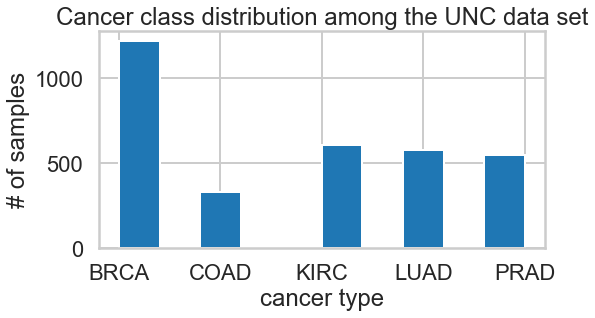

In [8]:
# Cancer class distribution among the UNC data set
plt.rcParams["figure.figsize"] = (8,4)
plt.title('Cancer class distribution among the UNC data set')
plt.hist(unc_mix5.label)
plt.xlabel('cancer type')
plt.ylabel('# of samples')

In [9]:
unc_BRCA_t.describe()

gene_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,...,ZNRF2|223082,ZNRF3|84133,ZNRF4|148066,ZP1|22917,ZP2|7783,ZP3|7784,ZP4|57829,ZPBP2|124626,ZPBP|11055,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.0,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,...,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.00000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,0.011215,8.671326,7.697737,113.498893,1055.816748,0.0,230.907261,0.526511,0.125719,0.023140,6.972629,1.588953,6.138664,0.568637,0.217794,0.002713,0.002062,0.012716,3.036983,858.114150,12.619481,23.663710,444.887241,0.000391,0.114834,0.556722,39.549158,532.321036,48.160794,188.215477,0.237625,3.866745,94.694529,254.286282,16556.131558,362.476682,0.882392,0.098957,713.824789,3.372221,1175.326596,0.816770,0.771061,0.058016,21.386740,89.586357,1629.140099,949.078273,2446.431507,0.464144,...,759.611916,443.418397,0.029193,5.244548,13.145472,228.177375,1.813849,1.443102,0.138697,46.429507,1137.268290,1412.516175,88.068926,318.093755,0.441062,53.967131,176.813884,165.797048,1133.795937,15.541919,83.036334,249.830591,136.018866,22.331833,533.006698,306.509373,2.270729,65.335547,1.491521,310.674923,0.063194,124.203331,443.641410,141.759406,409.939392,286.401247,195.054448,498.158654,455.310955,794.663520,66.763487,579.66591,1127.123562,105.461434,941.076923,4011.017305,1289.998543,984.442944,208.672295,0.116460
std,0.098578,7.657302,5.845470,59.044078,459.067089,0.0,186.532512,0.634348,2.004148,0.530771,145.235082,2.293605,3.502436,1.846640,0.388289,0.039583,0.040682,0.114725,10.949658,774.136152,12.064101,33.789605,624.476651,0.013653,0.663363,1.713830,354.912811,321.610407,60.702753,291.510876,3.604368,79.280805,53.850240,1171.882427,17592.747273,341.394046,1.371249,1.281274,217.823109,30.269483,1024.874751,7.390838,4.903481,0.238947,215.703783,173.605418,677.742088,328.516320,807.206843,1.473874,...,393.390348,1107.293102,0.483217,17.367224,132.493470,177.275066,18.222269,35.803912,0.380413,569.589339,537.726776,462.40

In [56]:
unc_mix5.describe()

gene_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,...,ZNRF2|223082,ZNRF3|84133,ZNRF4|148066,ZP1|22917,ZP2|7783,ZP3|7784,ZP4|57829,ZPBP2|124626,ZPBP|11055,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.021215,9.581185,9.972742,116.339906,936.694754,0.000082,216.881299,0.529434,0.108559,0.009021,4.438934,1.556304,6.234953,0.468773,0.288520,0.004068,0.002730,0.035217,85.675447,715.409264,11.672079,19.293673,417.041089,0.000145,0.147113,0.780758,83.906426,669.929816,58.043798,122.862220,51.068418,7.691297,142.310949,118.875369,20841.811931,562.816925,4.764375,0.423398,740.534840,8.375952,981.759677,0.573703,0.340323,0.222508,34.633787,168.409090,1229.149775,1098.280066,2630.426692,0.605682,...,653.291221,599.919503,0.054243,9.126494,7.440894,235.758937,0.713273,1.357821,0.159987,24.798659,957.540586,1323.156664,73.801821,266.720296,0.694769,38.299760,192.027902,142.572946,1101.211901,10.930528,63.931911,223.767022,116.979851,27.438702,460.348807,285.028326,3.451229,71.529454,1.664963,299.212091,0.068715,126.003429,416.234797,238.969898,429.428358,290.846956,168.226315,433.364916,354.564330,589.158044,65.620321,471.332032,1098.171711,67.660614,942.998186,3879.218887,1297.717995,823.928167,142.094664,0.113067
std,0.111396,8.341846,9.125450,64.707544,390.102453,0.004673,182.302347,0.706225,2.030339,0.324503,94.682828,5.351221,3.833831,2.008891,2.495416,0.049595,0.048645,0.245248,223.728529,634.804205,11.822294,29.453534,482.287476,0.008321,0.666510,1.613754,457.734014,362.654255,81.328536,264.358856,113.659864,56.728037,200.944023,892.335614,20332.375432,524.195673,56.575390,2.012951,228.781727,34.615004,724.462913,5.194998,3.117315,0.664565,224.225780,239.522934,597.641738,577.948841,839.705781,1.204411,...,341.463347,781.139145,0.830659,31.164636,126.814948,204.958227,11.166179,24.534226,0.398970,356.254916

In [10]:
unc_mix5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3279 entries, TCGA-3C-AAAU-01A-11R-A41B-07 to TCGA-ZG-A9NI-01A-11R-A41O-07
Columns: 20532 entries, ?|100130426 to label
dtypes: float64(20531), object(1)
memory usage: 513.7+ MB


C:\Users\Zhanyang\AppData\Local\Temp\ipykernel_26688\168860525.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unc_mix5.groupby(['label'])['?|100133144', '?|100134869', 'ZW10|9183','ZWILCH|55055', 'ZWINT|11130', 'ZXDA|7789'].mean().plot()


Text(0, 0.5, 'gene expression mean value')

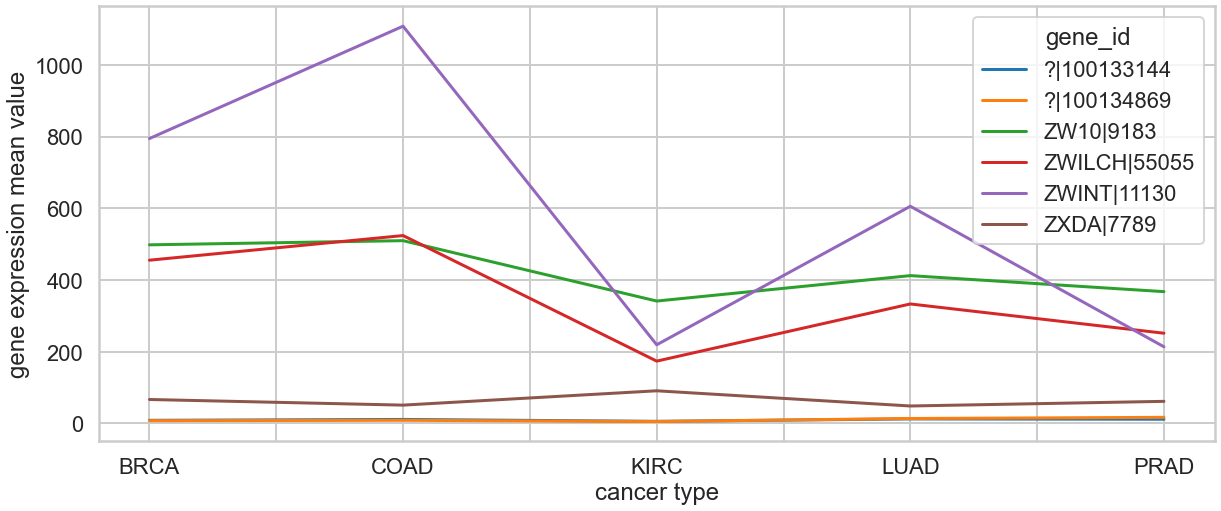

In [11]:
# gene expression mean by cancer type for gene ids - '?|100133144', '?|100134869', 'ZW10|9183','ZWILCH|55055', 'ZWINT|11130', 'ZXDA|7789'
plt.rcParams["figure.figsize"] = (20,8)
unc_mix5.groupby(['label'])['?|100133144', '?|100134869', 'ZW10|9183','ZWILCH|55055', 'ZWINT|11130', 'ZXDA|7789'].mean().plot()
plt.xlabel("cancer type")
plt.ylabel("gene expression mean value")

>#### In the plot above, we can see the 'ZWINT|11130' gene (the purple line) shows big mean changes for the five cancer types.

>#### Feature selections:  mean expression level for each cancer type?  the minimal of the means no less than X? 